In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# set data file path
os.environ["DATA_PATH"] = "./BPD_Part_1_Victim_Based_Crime_Data - Duplicate smaller.csv"
DATA_PATH = os.environ["DATA_PATH"]

In [3]:
# read csv data into pandas dataframe
df = pd.read_csv(DATA_PATH, sep=",", header=0, quotechar="\"", encoding="utf-8", on_bad_lines='skip', encoding_errors="ignore")

# configure pandas to view all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# show data
df = df[0:2000]

In [4]:
data = [x.split(',') for x in df["Location 1"] if str(x) != 'nan']

In [5]:
df = pd.DataFrame([(float(x[1:]), float(y[:-1])) for x, y in data], columns=["longitude", ""])
df

,longitude,
0,39.29241,-76.61408
1,39.28242,-76.59288
2,39.34805,-76.58834
3,39.36263,-76.55161
4,39.28938,-76.61971
5,39.37070,-76.56709
6,39.28624,-76.64455
7,39.29591,-76.56777
8,39.33177,-76.54873
9,39.30340,-76.63842


In [8]:
wcss = [] 
for number_of_clusters in range(2, 20): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state=42)
    kmeans.fit(df) 
    wcss.append(kmeans.inertia_)
wcss

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/valid

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/valid

[5.17586483475422,
 2.8106919027766164,
 1.9637284327978408,
 1.5023539654544977,
 1.2293278979929898,
 0.9651505525664189,
 0.7985939123574182,
 0.713293898168188,
 0.627968596700375,
 0.5606383426278778,
 0.5087836376346326,
 0.45355529199511097,
 0.41109589815911396,
 0.38074561246985283,
 0.35640910803813625,
 0.32321269853335677,
 0.30918806483958716,
 0.2865265902401398]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/valid

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/valid

IndexError: index 3 is out of bounds for axis 0 with size 3

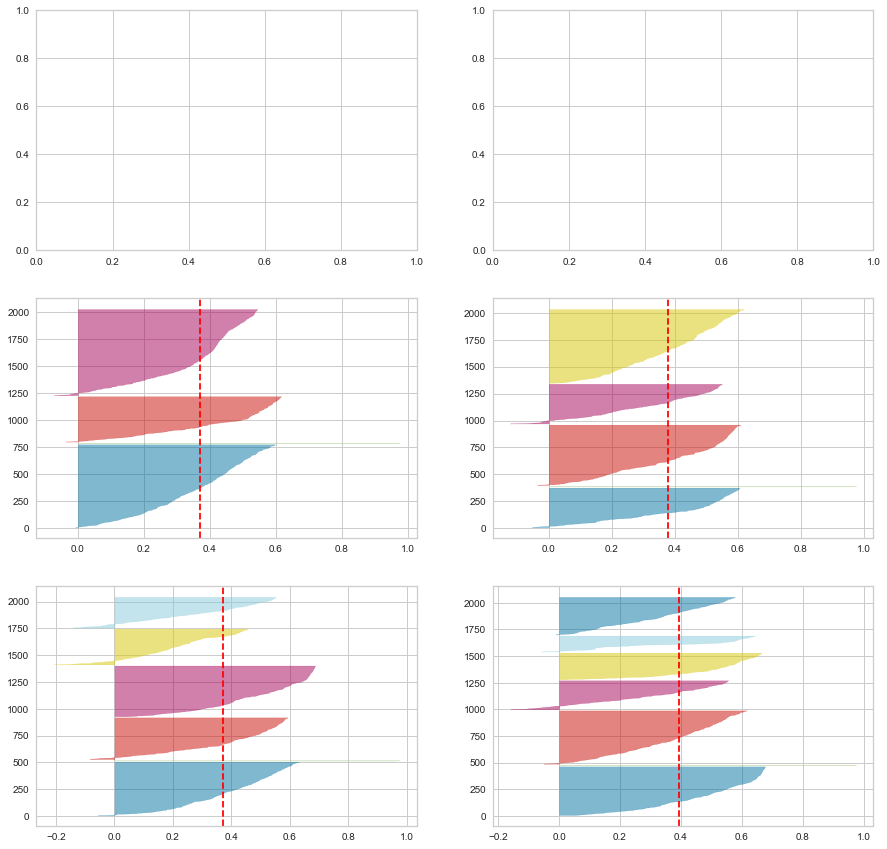

In [12]:
#silhouette score method
#Silhouette score takes into consideration the intra-cluster distance between 
#the sample and other data points within the same cluster (a) and inter-cluster 
#distance between the sample and the next nearest cluster (b)

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [4, 5, 6, 7, 8, 9]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)
    
fig.savefig("silhouette_visualization.png")